## Data Pipeline Steps
1. Data Extraction
2. Quality Assessment
3. Data cleaning/transformation
4. Data Validation (Business)
6. Feature Engineering
7. Data Modelling
8. Data Loading
9. Exploratory Data analysis and visualization

In [49]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data Extraction

In [50]:
# Extracting data from csv file
df = pd.read_csv(r"data\globex_retail_data.csv")

# Checking the first 5 rows
df.head(5)

,Customer_ID,Order_ID,Order_Date,Product_Category,Product_Sub_Category,Quantity,Price,Discount,Customer_Location,Revenue
0,CUST_013738,ORD_00102406,2023-01-01,Home & Garden,Gardening Tools,1,419.19,0.00,TN,419.1900
1,CUST_011726,ORD_00102902,2023-01-01,Electronics,Laptops,1,222.37,0.09,TN,202.3567
2,CUST_010891,ORD_00103864,2023-01-01,Electronics,Laptops,6,1107.65,0.00,IN,6645.9000
3,CUST_011452,ORD_00103560,2023-01-01,Electronics,Gaming Consoles,5,288.84,0.00,MA,1444.2000
4,CUST_010886,ORD_00100632,2023-01-02,Electronics,Headphones,1,191.27,0.00,AZ,191.2700


In [51]:
# Determine the number of rows and columns in the dataframe
df.shape

(5000, 10)

In [52]:
# Column names, null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           5000 non-null   object 
 1   Order_ID              5000 non-null   object 
 2   Order_Date            5000 non-null   object 
 3   Product_Category      5000 non-null   object 
 4   Product_Sub_Category  5000 non-null   object 
 5   Quantity              5000 non-null   int64  
 6   Price                 5000 non-null   float64
 7   Discount              5000 non-null   float64
 8   Customer_Location     5000 non-null   object 
 9   Revenue               5000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 390.8+ KB


### Data Quality Assessment

##### Completeness - checking for null values

In [53]:
# checking for null values in the data
df.isnull().sum()

Customer_ID             0
Order_ID                0
Order_Date              0
Product_Category        0
Product_Sub_Category    0
Quantity                0
Price                   0
Discount                0
Customer_Location       0
Revenue                 0
dtype: int64

##### Uniqueness - checking for duplicates

In [54]:
df.duplicated().sum() # no duplicate values reported

np.int64(0)

In [55]:
# to check the number of unique values in the customer ID

df['Customer_ID'].nunique()


3203

In [56]:
# to check the number of unique values in the customer ID

df['Order_ID'].nunique()

5000

##### Inconsistency - checking for the values in each column

In [57]:
# show summary statistics for numerical columns to see the min, max and mean values
df.describe()

,Quantity,Price,Discount,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.368800,330.240118,0.063534,743.955115
std,1.704631,427.081790,0.118311,1328.413944
min,1.000000,8.000000,0.000000,6.164400
25%,1.000000,54.017500,0.000000,94.601000
50%,2.000000,149.770000,0.000000,264.530250
75%,3.000000,415.087500,0.090000,767.867500
max,10.000000,1997.860000,0.500000,13819.840000


In [58]:
# check for values in the category column to ensure consistency
df.Product_Category.value_counts().sort_values(ascending=True)

Product_Category
Home & Garden    768
Beauty           821
Sports           826
Clothing         832
Books            871
Electronics      882
Name: count, dtype: int64

In [59]:
# check for values in the sub_category column to ensure consistency
df.Product_Sub_Category.value_counts().sort_values(ascending=True)

Product_Sub_Category
Kitchen Appliances    120
Makeup                121
Bedding               125
Storage               125
Outdoor Gear          127
Furniture             130
Shoes                 130
Headphones            132
Home Decor            132
Hair Care             133
Jeans                 133
Team Sports           133
Accessories           134
Educational           135
Laptops               136
Gardening Tools       136
Water Sports          136
Mens Shirts           136
Personal Care         137
Skincare              139
Magazines             139
Comics                139
Fitness Equipment     142
Fragrances            142
Winter Sports         143
Cycling               145
Children Books        146
Sportswear            148
Smartphones           148
Beauty Tools          149
Tablets               150
Womens Dresses        151
Non-Fiction           153
Smart Watches         156
Fiction               159
Gaming Consoles       160
Name: count, dtype: int64

In [60]:
# Check to ensure each customer location is in a two-letter format
location_lenght = df['Customer_Location'].str.len()
location_lenght.value_counts()

Customer_Location
2    5000
Name: count, dtype: int64

### Data Cleaning/Transformation

In [61]:
# Create a copy of the dataset to preserve an original source of truth for reference.
df_clean = df.copy()

In [62]:
# Changing the date to the correct format
df_clean['Order_Date'] = pd.to_datetime(df_clean['Order_Date'])

In [63]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Customer_ID           5000 non-null   object        
 1   Order_ID              5000 non-null   object        
 2   Order_Date            5000 non-null   datetime64[ns]
 3   Product_Category      5000 non-null   object        
 4   Product_Sub_Category  5000 non-null   object        
 5   Quantity              5000 non-null   int64         
 6   Price                 5000 non-null   float64       
 7   Discount              5000 non-null   float64       
 8   Customer_Location     5000 non-null   object        
 9   Revenue               5000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 390.8+ KB


### Data Validation (Business)

Field-level checks
(valid ranges, allowed values, data types).

Cross-field validation
(if Order_ID is not null , then Order Date must not be null).

Aggregate validation
(Numerical columns like quantity, price and total sales must be above 0. Revenue==Total sales * discount).

Business rule consistency
(discounts cannot exceed 50% without approval flag).

In [16]:
# field-level checks for numerical columns. Aggregrate validation shows price and quantity are above 0.
df_clean.describe()

,Order_Date,Quantity,Price,Discount,Revenue
count,5000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2023-12-30 16:11:42.719999744,2.368800,330.240118,0.063534,743.955115
min,2023-01-01 00:00:00,1.000000,8.000000,0.000000,6.164400
25%,2023-07-04 18:00:00,1.000000,54.017500,0.000000,94.601000
50%,2024-01-02 12:00:00,2.000000,149.770000,0.000000,264.530250
75%,2024-06-23 00:00:00,3.000000,415.087500,0.090000,767.867500
max,2024-12-31 00:00:00,10.000000,1997.860000,0.500000,13819.840000
std,NaN,1.704631,427.081790,0.118311,1328.413944


In [17]:
# field-level check for  non-numeical columns
df_clean.describe(include=['object'])

,Customer_ID,Order_ID,Product_Category,Product_Sub_Category,Customer_Location
count,5000,5000,5000,5000,5000
unique,3203,5000,6,36,30
top,CUST_013392,ORD_00102406,Electronics,Gaming Consoles,IL
freq,6,1,882,160,191


In [64]:
# Based on business requirement. revenue should equal total sales * discount. Checking that both values match, and if not, how many mismtaches
expected_revenue = df_clean['Quantity'] * df_clean['Price'] * (1 - df_clean['Discount'])

mismatch_count = (
    ~np.isclose(df_clean['Revenue'], expected_revenue, rtol=1e-05, atol=1e-08)
).sum()

print(f"Number of mismatches: {mismatch_count}")

Number of mismatches: 0


In [19]:
# To validate the business rule consistency of no discount above 50%
(df_clean['Discount'] > 0.5).sum()

np.int64(0)

### Feature Engineering

In [20]:
# Adding time-based columns (such as month, week, day)

# Month number (1–12)
df_clean['Month'] = df_clean['Order_Date'].dt.month  

# Day of week name (e.g. Monday, Tuesday)
df_clean['Day_Name'] = df_clean['Order_Date'].dt.day_name()

# Day of week number (Monday=0, Sunday=6)
df_clean['Day_Num'] = df_clean['Order_Date'].dt.dayofweek 



In [21]:
# To get hihg-value customers
df_clean['high_value_customers'] = df_clean['Revenue'] > df_clean['Revenue'].quantile(0.8)

In [22]:
# Checking the finally cleaned and transformed table
df_clean.head(5)

,Customer_ID,Order_ID,Order_Date,Product_Category,Product_Sub_Category,Quantity,Price,Discount,Customer_Location,Revenue,Month,Day_Name,Day_Num,high_value_customers
0,CUST_013738,ORD_00102406,2023-01-01,Home & Garden,Gardening Tools,1,419.19,0.00,TN,419.1900,1,Sunday,6,False
1,CUST_011726,ORD_00102902,2023-01-01,Electronics,Laptops,1,222.37,0.09,TN,202.3567,1,Sunday,6,False
2,CUST_010891,ORD_00103864,2023-01-01,Electronics,Laptops,6,1107.65,0.00,IN,6645.9000,1,Sunday,6,True
3,CUST_011452,ORD_00103560,2023-01-01,Electronics,Gaming Consoles,5,288.84,0.00,MA,1444.2000,1,Sunday,6,True
4,CUST_010886,ORD_00100632,2023-01-02,Electronics,Headphones,1,191.27,0.00,AZ,191.2700,1,Monday,0,False


### Data Modeling

In [23]:
df_model = df_clean.copy()

In [24]:
# Customer dimension

customer = df_model[['Customer_ID','Customer_Location', 'high_value_customers']].copy().drop_duplicates().reset_index(drop=True)
customer.head()

,Customer_ID,Customer_Location,high_value_customers
0,CUST_013738,TN,False
1,CUST_011726,TN,False
2,CUST_010891,IN,True
3,CUST_011452,MA,True
4,CUST_010886,AZ,False


In [25]:
# Order dimension

order = df_model[['Order_ID','Order_Date', 'Month', 'Day_Name', 'Day_Num']].copy().drop_duplicates().reset_index(drop=True)
order.head()

,Order_ID,Order_Date,Month,Day_Name,Day_Num
0,ORD_00102406,2023-01-01,1,Sunday,6
1,ORD_00102902,2023-01-01,1,Sunday,6
2,ORD_00103864,2023-01-01,1,Sunday,6
3,ORD_00103560,2023-01-01,1,Sunday,6
4,ORD_00100632,2023-01-02,1,Monday,0


In [26]:
# Product dimension

product = df_model[['Product_Category','Product_Sub_Category']].copy().drop_duplicates().reset_index(drop=True)

# Creating a PK column for the product table by changing the index name and thereafter resetting it.
product.index.name = 'Product_ID'
product = product.reset_index()

product.head()

,Product_ID,Product_Category,Product_Sub_Category
0,0,Home & Garden,Gardening Tools
1,1,Electronics,Laptops
2,2,Electronics,Gaming Consoles
3,3,Electronics,Headphones
4,4,Clothing,Shoes


In [27]:
# Facts table
facts_table = df_model.merge(
    product[['Product_ID', 'Product_Category', 'Product_Sub_Category']],
    on=['Product_Category', 'Product_Sub_Category'],
    how='left')

facts_table = facts_table[[
    'Customer_ID', 'Order_ID', 'Product_ID', 'Quantity', 'Price', 'Discount', 'Revenue'
]].copy()

facts_table.head(5)

,Customer_ID,Order_ID,Product_ID,Quantity,Price,Discount,Revenue
0,CUST_013738,ORD_00102406,0,1,419.19,0.00,419.1900
1,CUST_011726,ORD_00102902,1,1,222.37,0.09,202.3567
2,CUST_010891,ORD_00103864,1,6,1107.65,0.00,6645.9000
3,CUST_011452,ORD_00103560,2,5,288.84,0.00,1444.2000
4,CUST_010886,ORD_00100632,3,1,191.27,0.00,191.2700


### Data Loading

In [28]:
from sqlalchemy import create_engine
from dotenv import load_dotenv; load_dotenv()
import psycopg2
import os

In [29]:
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')

In [30]:
#define the database connectin url with db parameters
db_url = f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

#Create the database engine with the db url
engine = create_engine(db_url)

#Connect to PostgreSQL server
with engine.connect() as connection:

#load to database
    customer.to_sql('customer', connection, if_exists='replace', index=False)
    order.to_sql('order', connection, if_exists='replace', index=False)
    product.to_sql('product', connection, if_exists='replace', index=False)
    facts_table.to_sql('fact_table', connection, if_exists='replace', index=False)

print('data loaded successfully')

data loaded successfully


### Data Analysis and Visualization

In [31]:
df_analysis = df_clean.copy()

# Which product category has generated the most revenue?
category_revenue = df_analysis.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=True)
category_revenue

Product_Category
Books            6.522193e+04
Beauty           1.371077e+05
Clothing         2.819485e+05
Sports           4.744529e+05
Home & Garden    6.814707e+05
Electronics      2.079574e+06
Name: Revenue, dtype: float64

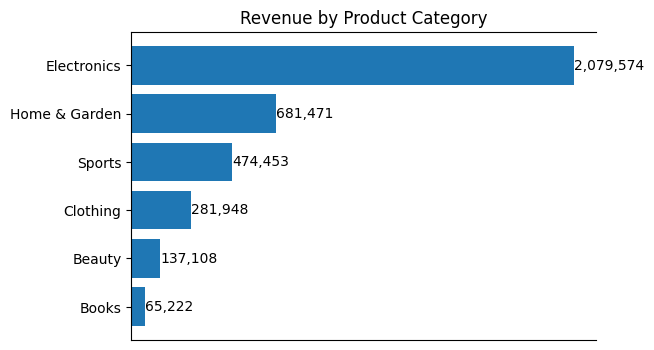

In [66]:
fig, ax = plt.subplots(figsize=(6,4))

bars = ax.barh(category_revenue.index, category_revenue)
ax.bar_label(bars, labels=[f'{value:,.0f}' for value in category_revenue]) # Add formatted labels inside bars
ax.set_xticks([]) # Remove x-ticks
ax.set_title('Revenue by Product Category')
ax.spines['right'].set_visible(False) # Remove right spine for cleaner look
plt.show()


In [33]:
# Which product subcategories generate the most revenue?
sub_category_revenue = df_analysis.groupby('Product_Sub_Category')['Revenue'].sum().sort_values(ascending=True)
top10_sub_category_revenue = sub_category_revenue.tail(10)
print(top10_sub_category_revenue)

Product_Sub_Category
Home Decor            109826.6465
Storage               110330.1389
Kitchen Appliances    125048.8293
Gardening Tools       129829.3451
Laptops               310999.7473
Headphones            318398.7129
Gaming Consoles       332296.2353
Tablets               348740.8234
Smartphones           365802.8764
Smart Watches         403335.4208
Name: Revenue, dtype: float64


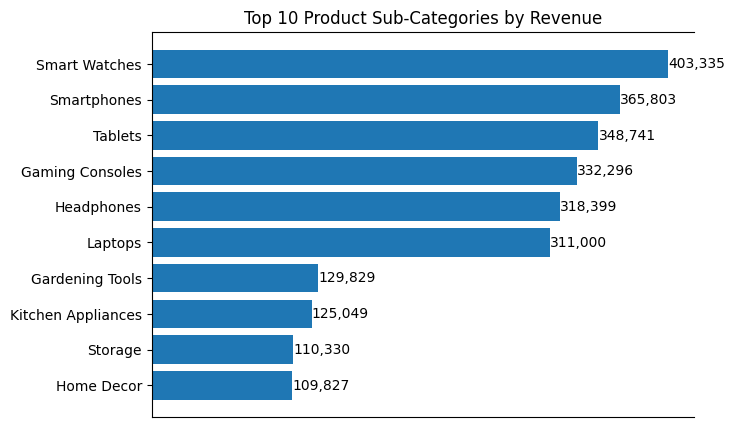

In [68]:
# top 10 sub-categories
fig, ax = plt.subplots(figsize=(7,5))

bars = ax.barh(top10_sub_category_revenue.index, top10_sub_category_revenue)
ax.bar_label(bars, labels=[f'{value:,.0f}' for value in top10_sub_category_revenue])
ax.set_xticks([])
ax.set_title('Top 10 Product Sub-Categories by Revenue')
ax.spines['right'].set_visible(False)
plt.show()


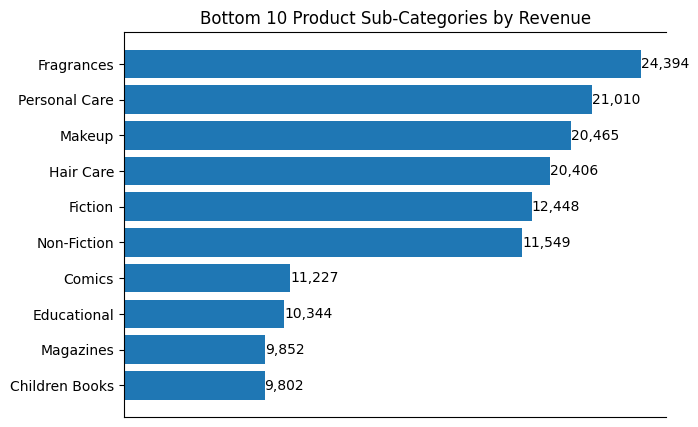

In [69]:
bottom10_sub_category_revenue = sub_category_revenue.head(10)

fig, ax = plt.subplots(figsize=(7,5))
bars = ax.barh(bottom10_sub_category_revenue.index, top10_sub_category_revenue)
ax.bar_label(bars, labels=[f'{value:,.0f}' for value in bottom10_sub_category_revenue])
ax.set_xticks([])
ax.set_title('Bottom 10 Product Sub-Categories by Revenue')
ax.spines['right'].set_visible(False)
plt.show()


In [36]:
# Which customer location has the highest average order value?
orders = df_analysis.groupby(['Customer_Location', 'Order_ID'])['Revenue'].sum().reset_index()
aov_location = orders.groupby('Customer_Location')['Revenue'].mean().sort_values(ascending=False)

aov_location.head(10)

Customer_Location
CO    1048.857624
MN     943.655892
NC     878.105915
WI     864.129433
UT     850.593842
SC     842.341545
IN     835.582691
OH     816.625837
PA     790.779050
OR     786.874981
Name: Revenue, dtype: float64

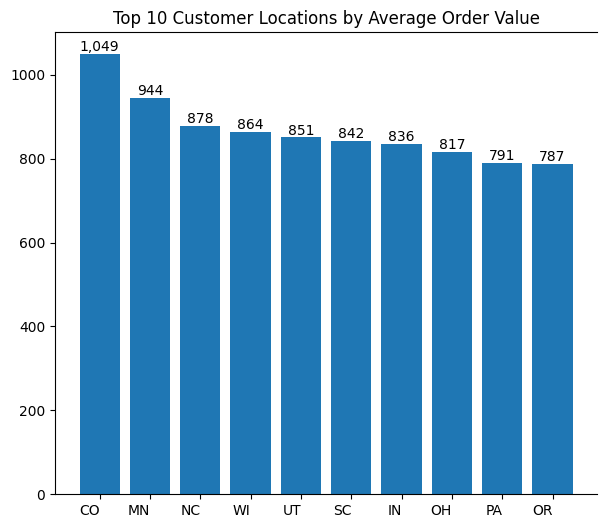

In [71]:
# Top 10
top10_aov_location = aov_location.head(10)

fig, ax = plt.subplots(figsize=(7,6)) # Plot column chart
bars = ax.bar(top10_aov_location.index, top10_aov_location)
ax.bar_label(bars, labels=[f'{value:,.0f}' for value in top10_aov_location])
plt.xticks(ha='right') 
ax.set_title('Top 10 Customer Locations by Average Order Value')
ax.spines['right'].set_visible(False)

plt.show()

In [72]:
# What is the average discount applied to high-value customers?

# Average discount for high-value customers
avg_discount_high = df_analysis.loc[df_analysis['high_value_customers'], 'Discount'].mean()

# Average discount for non-high-value customers (for comparison)
avg_discount_non_high = df_analysis.loc[~df_analysis['high_value_customers'], 'Discount'].mean()

print("Average discount (High-Value Customers):", round(avg_discount_high, 4))
print("Average discount (Other Customers):", round(avg_discount_non_high, 4))


Average discount (High-Value Customers): 0.0461
Average discount (Other Customers): 0.0679


In [73]:
# Which geographic locations have the highest concentration of high-value customers?

loc_stats = (
    df_analysis.groupby('Customer_Location')['high_value_customers']
    .agg(total_high_value='sum', concentration='mean')
    .sort_values('concentration', ascending=False)
)

print(loc_stats.head(10))

                   total_high_value  concentration
Customer_Location                                 
CO                               52       0.279570
NC                               42       0.272727
MN                               43       0.265432
UT                               38       0.263889
IN                               31       0.226277
GA                               35       0.217391
MD                               40       0.212766
PA                               36       0.211765
OR                               34       0.211180
IL                               40       0.209424


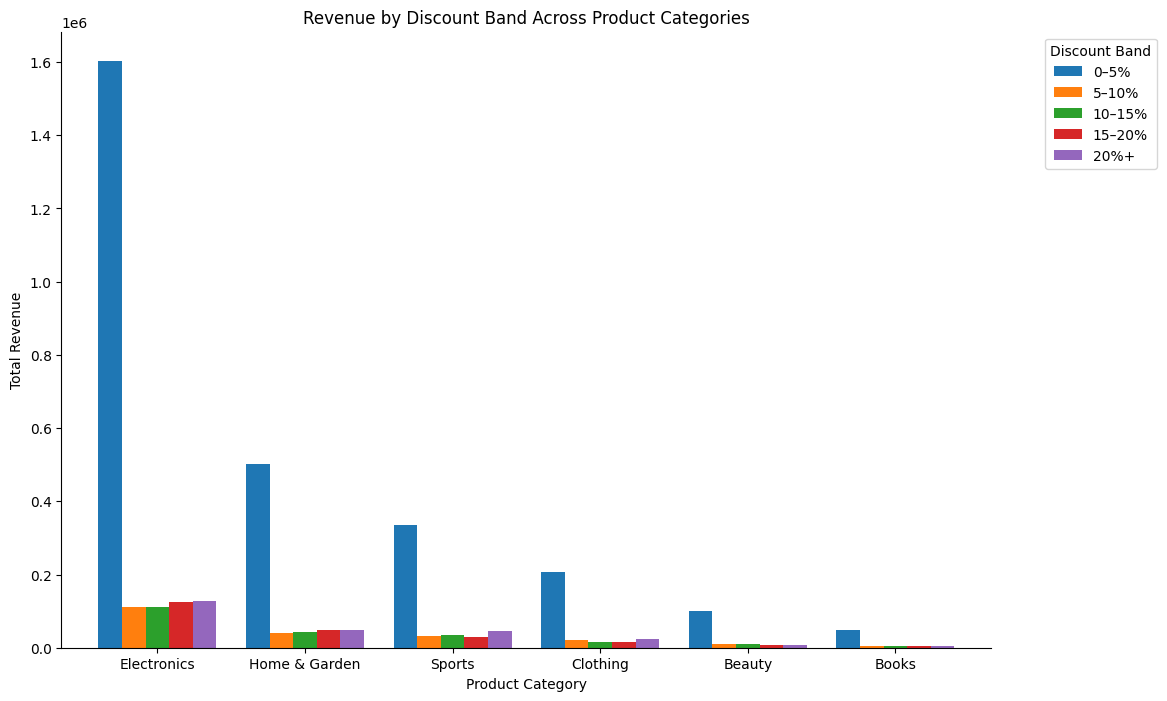

In [74]:
#How does the discount rate impact the total sales across different product categories?

# --- 1) Bin discounts into readable bands ---
bins = [0, 0.05, 0.10, 0.15, 0.20, 1.01] 
labels = ['0–5%', '5–10%', '10–15%', '15–20%', '20%+']

df_use = df_analysis.copy()
df_use['Discount_Bin'] = pd.cut(df_use['Discount'], bins=bins, labels=labels, include_lowest=True, right=False)

# --- 2) Revenue by Category x Discount Band (wide form for plotting) 
rev_cat_disc = (df_use
                .groupby(['Product_Category', 'Discount_Bin'], observed=True)['Revenue']
                .sum()
                .unstack('Discount_Bin')
                .fillna(0))

# Sort categories by total revenue so the chart reads left→right by importance
rev_cat_disc = rev_cat_disc.loc[rev_cat_disc.sum(axis=1).sort_values(ascending=False).index]

# --- 3) Clustered bar chart: Categories on x-axis; one bar per discount band ---
ax = rev_cat_disc.plot(kind='bar', figsize=(12, 8), width=0.8, rot=0)
ax.set_title('Revenue by Discount Band Across Product Categories')
ax.set_xlabel('Product Category')
ax.set_ylabel('Total Revenue')
ax.legend(title='Discount Band', bbox_to_anchor=(1.05, 1), loc='upper left')  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



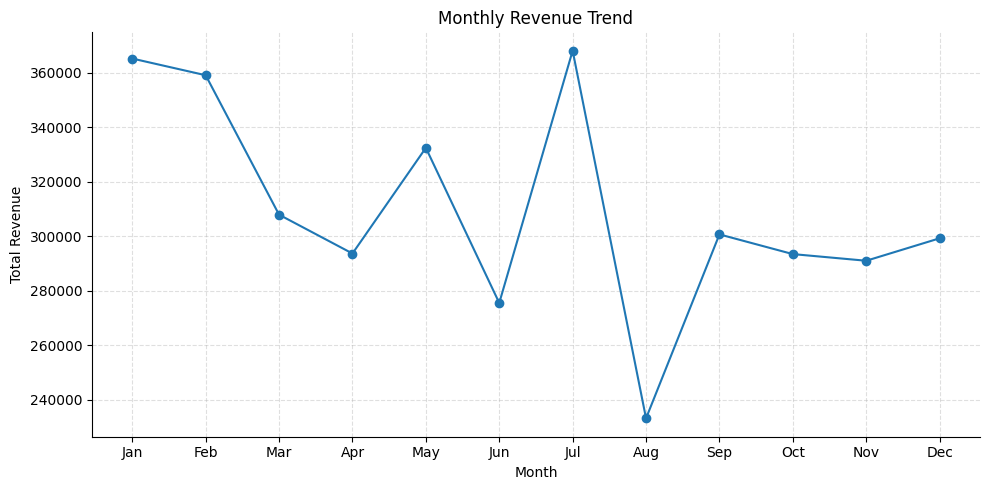

In [41]:
# Monthly revenue trend

import calendar

monthly = (
    df_analysis.groupby('Month')['Revenue']
    .sum()
    .reset_index()
    .sort_values('Month')
)

# Map numbers 1–12 → Jan, Feb, ...
monthly['Month_Name'] = monthly['Month'].apply(lambda x: calendar.month_abbr[int(x)])

plt.figure(figsize=(10, 5))
plt.plot(monthly['Month_Name'], monthly['Revenue'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.4)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


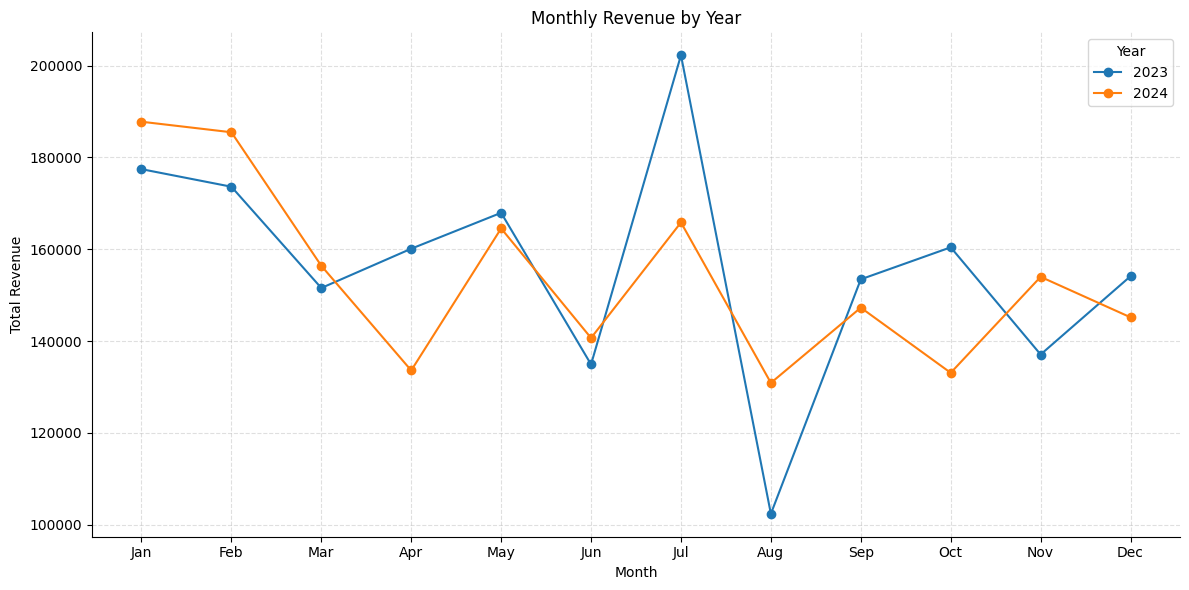

In [75]:
# Group by Year and Month, pivot: rows=Month, cols=Year
pivot = (
    df_analysis
    .groupby([pd.to_datetime(df_analysis['Order_Date']).dt.year, 'Month'])['Revenue']
    .sum()
    .unstack(0)  # columns: 2023, 2024)
    .sort_index()  # sort by Month
)

# Reindex to ensure months 1..12 show even if missing
pivot = pivot.reindex(range(1, 12+1))

plt.figure(figsize=(12, 6))
for yr in pivot.columns:
    plt.plot(pivot.index, pivot[yr], marker='o', label=str(yr))

plt.xticks(range(1, 13), [calendar.month_abbr[m] for m in range(1, 13)])
plt.title('Monthly Revenue by Year')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.4)
ax = plt.gca(); ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


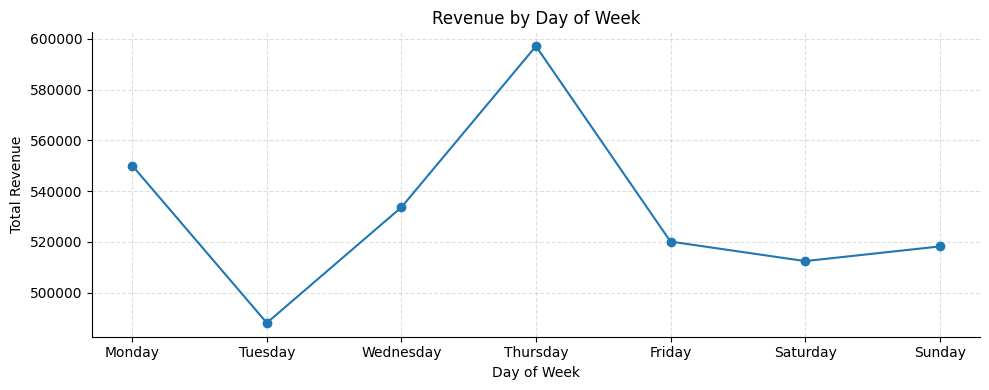

In [42]:
# Day of the week revenue trend

dow = (
    df_analysis.groupby(['Day_Num', 'Day_Name'])['Revenue']
    .sum()
    .reset_index()
    .sort_values('Day_Num')   # ensures Mon→Sun order
)

plt.figure(figsize=(10, 4))
plt.plot(dow['Day_Name'], dow['Revenue'], marker='o')
plt.title('Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.4)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()
